<a href="https://colab.research.google.com/github/wajihawajid/Fake-News-Detection-using-Deep-Learning/blob/main/Fake_News_on_Fake_and_Real_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import sklearn
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, Dropout,GRU


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Upload Datasets

In [38]:
from google.colab import files
uploaded_fake = files.upload()

Saving Fake.csv to Fake (2).csv


In [41]:
uploaded_True = files.upload()

Saving True.csv to True (2).csv


### **Read Datasets**

In [42]:
true = pd.read_csv("True.csv")
fake = pd.read_csv("Fake (1).csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### **Associate Labels**

In [43]:
fake['label'] = 0
true['label'] = 1

## **Data Preprocessing**

### **Drop unnecassary columns**

In [44]:
true.drop(true.columns[true.columns.str.contains('title',case = False)],axis = 1, inplace = True)
true.drop(true.columns[true.columns.str.contains('subject',case = False)],axis = 1, inplace = True)
true.drop(true.columns[true.columns.str.contains('date',case = False)],axis = 1, inplace = True)

fake.drop(fake.columns[fake.columns.str.contains('title',case = False)],axis = 1, inplace = True)
fake.drop(fake.columns[fake.columns.str.contains('subject',case = False)],axis = 1, inplace = True)
fake.drop(fake.columns[fake.columns.str.contains('date',case = False)],axis = 1, inplace = True)
fake.drop(fake.columns[fake.columns.str.contains('Unnamed:',case = False)],axis = 1, inplace = True)

### **Combine fake and real datasets**

In [45]:
data = pd.concat([fake,true])

In [ ]:
data

## **Shuffle data**

In [46]:
data = sklearn.utils.shuffle(data)

## **Removing Non English Words, Lower casing and whitespaces**

In [47]:
data['text'] = data['text'].str.replace('[^A-z ]','').str.lower().str.strip()

### **Stop Words removing**

In [48]:
text = data['text']
label = data['label']
stop_words = list(stopwords.words('english')) 
filterd_data = []
for words in text:
  if words not in stop_words:
    filterd_data.append(words)

### **Tokenization**

In [49]:
max_len = 200
max_features = 8000

In [50]:
tokenizer = Tokenizer(num_words = max_features)
tokenizer.fit_on_texts(filterd_data)
sequence = tokenizer.texts_to_sequences(filterd_data)
ready_data = pad_sequences(sequence, maxlen = max_len)

In [ ]:
print(ready_data.shape)

(44919, 200)


## **Split data into training, testing and validation**

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ready_data, data.label, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

## **LSTM Model**

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding(max_features, 128))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(32, activation = 'relu'))
model_lstm.add(Dense(1, activation = 'sigmoid'))
model_lstm.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
lstm = model_lstm.fit(X_train,y_train, epochs = 10, validation_data= (X_val, y_val))

Epoch 1/10
843/843 [==============================] - 220s 258ms/step - loss: 0.2055 - acc: 0.9195 - val_loss: 0.0672 - val_acc: 0.9774
Epoch 2/10
843/843 [==============================] - 218s 259ms/step - loss: 0.0510 - acc: 0.9837 - val_loss: 0.0512 - val_acc: 0.9843
Epoch 3/10
843/843 [==============================] - 230s 273ms/step - loss: 0.0324 - acc: 0.9905 - val_loss: 0.0547 - val_acc: 0.9855
Epoch 4/10
843/843 [==============================] - 229s 271ms/step - loss: 0.0266 - acc: 0.9919 - val_loss: 0.0576 - val_acc: 0.9850
Epoch 5/10
843/843 [==============================] - 228s 270ms/step - loss: 0.0237 - acc: 0.9937 - val_loss: 0.0585 - val_acc: 0.9869
Epoch 6/10
843/843 [==============================] - 229s 272ms/step - loss: 0.0156 - acc: 0.9964 - val_loss: 0.0439 - val_acc: 0.9879
Epoch 7/10
843/843 [==============================] - 233s 277ms/step - loss: 0.0148 - acc: 0.9954 - val_loss: 0.0557 - val_acc: 0.9890
Epoch 8/10
843/843 [============================

In [ ]:
model_lstm.evaluate(X_test,y_test)

281/281 [==============================] - 18s 63ms/step - loss: 0.0610 - acc: 0.9873


[0.06100459024310112, 0.9873107671737671]

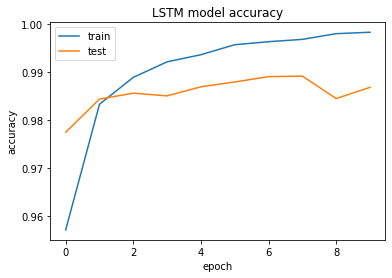

In [ ]:
plt.plot(lstm.history['acc'])
plt.plot(lstm.history['val_acc'])
plt.title('LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
lstm_pred=model_lstm.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,lstm_pred)

0.9868360277136259

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,lstm_pred)

0.9825247183260519

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,lstm_pred)

0.9911853398283461

## **Bi_Diractional LSTM**

In [ ]:
model_bi=Sequential()
model_bi.add(Embedding(max_features, 128))
model_bi.add(Bidirectional(LSTM(100)))
model_bi.add(Dropout(0.4))
model_bi.add(Dense(1,activation='sigmoid'))
model_bi.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
bi =model_bi.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=64)

Epoch 1/10
422/422 [==============================] - 273s 638ms/step - loss: 0.2873 - accuracy: 0.8639 - val_loss: 0.0920 - val_accuracy: 0.9669
Epoch 2/10
422/422 [==============================] - 267s 633ms/step - loss: 0.0590 - accuracy: 0.9800 - val_loss: 0.0590 - val_accuracy: 0.9813
Epoch 3/10
422/422 [==============================] - 268s 635ms/step - loss: 0.0368 - accuracy: 0.9893 - val_loss: 0.0643 - val_accuracy: 0.9790
Epoch 4/10
422/422 [==============================] - 267s 633ms/step - loss: 0.0372 - accuracy: 0.9875 - val_loss: 0.0503 - val_accuracy: 0.9848
Epoch 5/10
422/422 [==============================] - 267s 634ms/step - loss: 0.0116 - accuracy: 0.9973 - val_loss: 0.0860 - val_accuracy: 0.9727
Epoch 6/10
422/422 [==============================] - 267s 633ms/step - loss: 0.0171 - accuracy: 0.9955 - val_loss: 0.0591 - val_accuracy: 0.9822
Epoch 7/10
422/422 [==============================] - 269s 638ms/step - loss: 0.0141 - accuracy: 0.9958 - val_loss: 0.0741 -

In [ ]:
model_bi.evaluate(X_test,y_test)

281/281 [==============================] - 22s 78ms/step - loss: 0.0861 - accuracy: 0.9733


[0.08607695996761322, 0.9732858538627625]

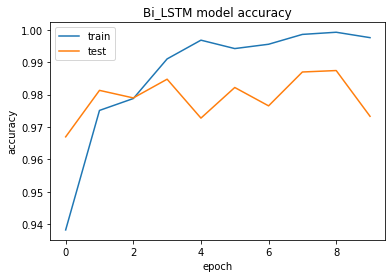

In [ ]:
plt.plot(bi.history['accuracy'])
plt.plot(bi.history['val_accuracy'])
plt.title('Bi_LSTM model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
bi_lstm_pred=model_bi.predict_classes(X_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,bi_lstm_pred)

0.9721577726218097

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,bi_lstm_pred)

0.9634398712347666

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,bi_lstm_pred)

0.9810348864434558

## **CNN Model**

In [53]:
from keras.layers import InputLayer, Conv1D, Dense, Flatten, MaxPooling1D,GlobalMaxPooling1D
model_cnn=Sequential()
model_cnn.add(Embedding(max_features, 128))
model_cnn.add(Conv1D(256, 28, activation='relu')),
model_cnn.add(GlobalMaxPooling1D()),
model_cnn.add(Dense(1,activation='sigmoid')),
model_cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
cnn = model_cnn.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,batch_size=10)

Epoch 1/10
2696/2696 [==============================] - 661s 245ms/step - loss: 0.1494 - accuracy: 0.9360 - val_loss: 0.0351 - val_accuracy: 0.9898
Epoch 2/10
2696/2696 [==============================] - 661s 245ms/step - loss: 0.0116 - accuracy: 0.9963 - val_loss: 0.0383 - val_accuracy: 0.9900
Epoch 3/10
2696/2696 [==============================] - 661s 245ms/step - loss: 0.0038 - accuracy: 0.9993 - val_loss: 0.0617 - val_accuracy: 0.9851
Epoch 4/10
2696/2696 [==============================] - 663s 246ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0618 - val_accuracy: 0.9899
Epoch 5/10
2696/2696 [==============================] - 664s 246ms/step - loss: 0.0052 - accuracy: 0.9987 - val_loss: 0.1146 - val_accuracy: 0.9814
Epoch 6/10
2696/2696 [==============================] - 660s 245ms/step - loss: 0.0033 - accuracy: 0.9992 - val_loss: 0.0818 - val_accuracy: 0.9878
Epoch 7/10
2696/2696 [==============================] - 656s 243ms/step - loss: 0.0034 - accuracy: 0.9993 - val_

In [54]:
model_cnn.evaluate(X_test,y_test)

281/281 [==============================] - 47s 166ms/step - loss: 0.1307 - accuracy: 0.9879


[0.13068445026874542, 0.9878672957420349]

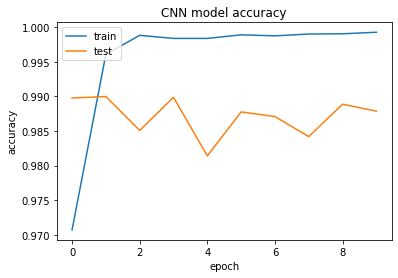

In [55]:
plt.plot(cnn.history['accuracy'])
plt.plot(cnn.history['val_accuracy'])
plt.title('CNN model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
cnn_pred=model_cnn.predict_classes(X_test)

In [57]:
from sklearn.metrics import f1_score
f1_score(y_test,bi_lstm_pred)

0.4746398032095584

In [58]:
from sklearn.metrics import recall_score
recall_score(y_test,bi_lstm_pred)

0.47491795593061414

In [59]:
from sklearn.metrics import precision_score
precision_score(y_test,bi_lstm_pred)

0.4743619761180051

## **GRU Network**

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(max_features, 128))
model_gru.add(GRU(128))
model_gru.add(Dense(1, activation = 'sigmoid'))
model_gru.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
gru = model_gru.fit(X_train,y_train, epochs = 10, batch_size=10 ,validation_data= (X_val, y_val))

Epoch 1/10
2696/2696 [==============================] - 413s 152ms/step - loss: 0.1931 - acc: 0.9289 - val_loss: 0.0928 - val_acc: 0.9715
Epoch 2/10
2696/2696 [==============================] - 415s 154ms/step - loss: 0.0528 - acc: 0.9827 - val_loss: 0.0522 - val_acc: 0.9832
Epoch 3/10
2696/2696 [==============================] - 414s 154ms/step - loss: 0.0297 - acc: 0.9908 - val_loss: 0.0455 - val_acc: 0.9879
Epoch 4/10
2696/2696 [==============================] - 414s 153ms/step - loss: 0.0226 - acc: 0.9934 - val_loss: 0.0434 - val_acc: 0.9881
Epoch 5/10
2696/2696 [==============================] - 414s 153ms/step - loss: 0.0146 - acc: 0.9960 - val_loss: 0.0658 - val_acc: 0.9842
Epoch 6/10
1919/2696 [====================>.........] - ETA: 1:54 - loss: 0.0109 - acc: 0.9973

In [ ]:
model_gru.evaluate(X_test,y_test)

In [ ]:
plt.plot(gru.history['acc'])
plt.plot(gru.history['val_acc'])
plt.title('GRU model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
gru_pred=model_gru.predict_classes(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test,gru_pred)

In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test,gru_pred)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test,gru_pred)